In [56]:
import os
import sys
sys.path.append(os.path.abspath('..')) # add parent path to working directory

In [57]:
from importlib import reload
from scripts import yf_data_fetch, stock_data_analyzer
reload(yf_data_fetch)
reload(stock_data_analyzer)

<module 'scripts.stock_data_analyzer' from 'c:\\ML and DS Files\\Kifiya AI\\Kaim-week-11\\scripts\\stock_data_analyzer.py'>

In [ ]:
from scripts.yf_data_fetch import YFinanceDataCollector # import StockDataFetcher class

# Fetch data from yfinance

In [59]:
tickers = ["TSLA", "BND", "SPY"]
start_date = "2015-01-01"
end_date = "2025-01-31"
columns = ["Date", "Open", "High", "Low", "Close", "Volume"]

In [60]:
# instantiate object
collector = YFinanceDataCollector(tickers, start_date, end_date, columns)

2025-02-28 20:37:27,879 - INFO - Initialized YFinanceDataCollector with tickers: ['TSLA', 'BND', 'SPY'], date range: 2015-01-01 to 2025-01-31


In [64]:
# fetch data
output_directory = "../week 11 data/Data"  # Specify your desired output directory

In [65]:
collector.save_to_csv(output_directory)

2025-02-28 20:39:18,109 - INFO - Saving data for TSLA to ../week 11 data/Data/TSLA.csv
2025-02-28 20:39:18,112 - INFO - Fetching data for TSLA


[*********************100%***********************]  1 of 1 completed

2025-02-28 20:39:18,251 - INFO - Data fetching complete for TSLA.
2025-02-28 20:39:18,318 - INFO - Data for TSLA successfully saved to ../week 11 data/Data/TSLA.csv
2025-02-28 20:39:18,324 - INFO - Saving data for BND to ../week 11 data/Data/BND.csv
2025-02-28 20:39:18,326 - INFO - Fetching data for BND



[*********************100%***********************]  1 of 1 completed

2025-02-28 20:39:18,481 - INFO - Data fetching complete for BND.
2025-02-28 20:39:18,513 - INFO - Data for BND successfully saved to ../week 11 data/Data/BND.csv
2025-02-28 20:39:18,520 - INFO - Saving data for SPY to ../week 11 data/Data/SPY.csv
2025-02-28 20:39:18,520 - INFO - Fetching data for SPY



[*********************100%***********************]  1 of 1 completed

2025-02-28 20:39:18,631 - INFO - Data fetching complete for SPY.


2025-02-28 20:39:18,691 - INFO - Data for SPY successfully saved to ../week 11 data/Data/SPY.csv


# Preprocess

In [91]:
reload(stock_data_analyzer)
from scripts.stock_data_analyzer import StockDataAnalyzer

In [92]:
file_paths = {
        "TSLA": "../week 11 data/Data/TSLA.csv",
        "BND": "../week 11 data/Data/BND.csv",
        "SPY": "../week 11 data/Data/SPY.csv"
 }
import warnings
warnings.filterwarnings('ignore')

In [93]:
analyzer = StockDataAnalyzer(file_paths)

In [94]:
analyzer.load_data()              # Step 1: Load Data

2025-02-28 21:13:52,373 - INFO - Loading data for TSLA from ../week 11 data/Data/TSLA.csv...
2025-02-28 21:13:52,396 - INFO - Loading data for BND from ../week 11 data/Data/BND.csv...
2025-02-28 21:13:52,413 - INFO - Loading data for SPY from ../week 11 data/Data/SPY.csv...


In [95]:
analyzer.display_basic_statistics()  # Step 2: Display Basic Statistics


Basic Statistics for TSLA:



,Column,count,mean,std,min,25%,50%,75%,max
0,Open,2535.000000,117.877662,116.611575,9.488000,17.259334,31.299999,222.653336,475.899994
1,High,2535.000000,120.474827,119.236025,10.331333,17.527667,32.329334,226.696671,488.540009
2,Low,2535.000000,115.097514,113.698930,9.403333,16.942000,29.760000,217.061661,457.510010
3,Close,2535.000000,117.848209,116.508288,9.578000,17.228000,30.298000,221.525002,479.859985
4,Volume,2535.000000,112030827.692308,73875087.256938,10620000.000000,66802950.000000,92641800.000000,129428300.000000,914082000.000000



Basic Statistics for BND:



,Column,count,mean,std,min,25%,50%,75%,max
0,Open,2535.000000,69.293224,4.793199,61.891461,65.552721,68.310226,72.845710,78.884935
1,High,2535.000000,69.391261,4.800408,61.937373,65.630196,68.457869,72.946418,78.920165
2,Low,2535.000000,69.186012,4.782142,61.822628,65.475496,68.169740,72.728801,78.788028
3,Close,2535.000000,69.289451,4.792145,61.860867,65.565258,68.329117,72.879929,78.823265
4,Volume,2535.000000,4233200.355030,2796083.151082,0.000000,2057700.000000,3805800.000000,5626700.000000,31937200.000000



Basic Statistics for SPY:



,Column,count,mean,std,min,25%,50%,75%,max
0,Open,2535.000000,316.021384,117.921618,156.354943,214.972492,277.230781,406.100271,609.809998
1,High,2535.000000,317.725660,118.486410,157.864136,215.702238,277.919580,409.134341,610.780029
2,Low,2535.000000,314.157889,117.269902,154.676927,214.206885,276.073703,402.830888,606.799988
3,Close,2535.000000,316.067402,117.926910,156.800842,214.841980,277.117920,405.869186,609.750000
4,Volume,2535.000000,87146546.824458,44872532.141204,20270000.000000,58620050.000000,76428700.000000,101886600.000000,507244300.000000


In [96]:
analyzer.check_missing_values()   # Step 3: Check Missing Values


Missing Values Summary:



,Ticker,Column,Missing Values,Missing Percentage,Data Type
0,TSLA,Date,0,0.000000,datetime64[ns]
1,TSLA,Open,0,0.000000,float64
2,TSLA,High,0,0.000000,float64
3,TSLA,Low,0,0.000000,float64
4,TSLA,Close,0,0.000000,float64
5,TSLA,Volume,0,0.000000,int64
6,BND,Date,0,0.000000,datetime64[ns]
7,BND,Open,0,0.000000,float64
8,BND,High,0,0.000000,float64
9,BND,Low,0,0.000000,float64


In [98]:
analyzer.detect_and_remove_outliers()       # Step 5: Detect and remove Outliers

2025-02-28 21:14:26,971 - INFO - Detecting and removing outliers in daily returns.
2025-02-28 21:14:26,987 - INFO - Removed 149 outliers from TSLA. New shape: (2385, 6)
2025-02-28 21:14:26,992 - INFO - Removed 114 outliers from BND. New shape: (2420, 6)
2025-02-28 21:14:27,011 - INFO - Removed 167 outliers from SPY. New shape: (2367, 6)


In [99]:
analyzer.analyze_volatility()     # Step 6: Volatility Analysis

2025-02-28 21:15:21,340 - INFO - Analyzing volatility with a rolling window of 30 days.

Volatility Summary:



,Ticker,Mean Rolling Std,Max Rolling Std,Min Rolling Std
0,TSLA,9.799438,59.274038,0.226824
1,BND,0.413877,1.397017,0.090796
2,SPY,6.089222,30.196608,0.766968


2025-02-28 21:16:14,650 - INFO - Plotting closing prices for all assets.


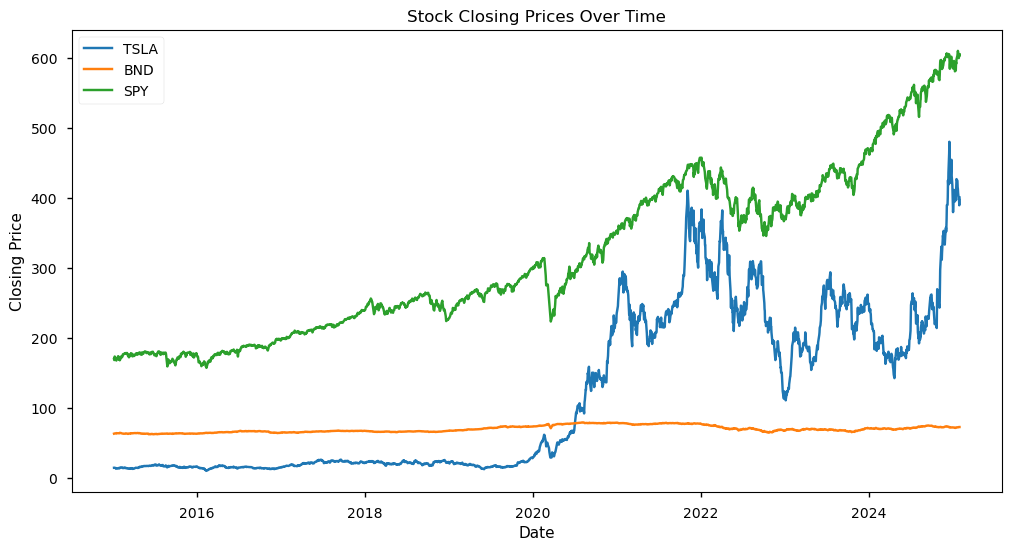

In [100]:
analyzer.plot_closing_price()     # Step 7: Plot Closing Prices

2025-02-28 21:16:42,388 - INFO - Plotting daily returns.


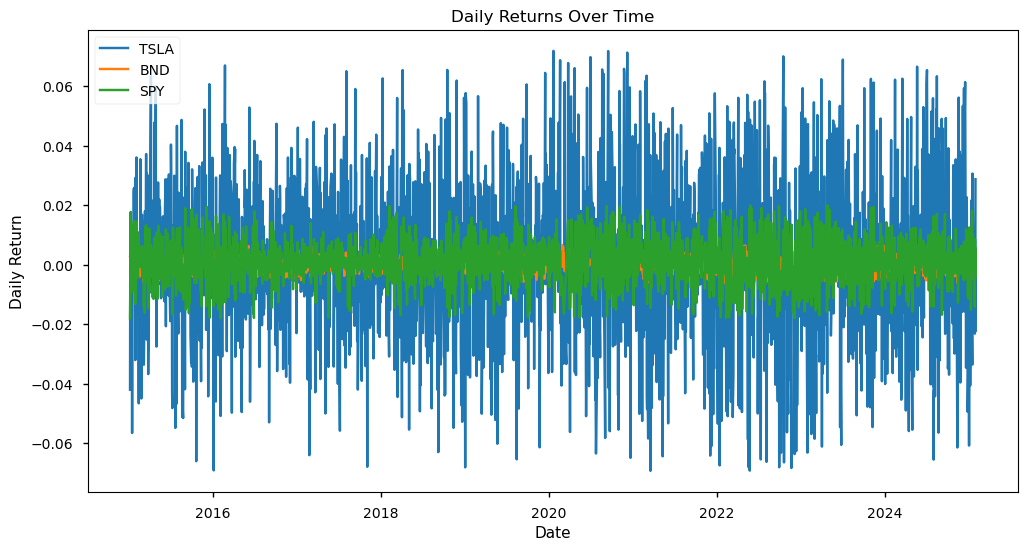

In [101]:
analyzer.plot_daily_returns()     # Step 8: Plot Daily Returns